In [0]:
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt 
import tensorflow.nn as nn 
from sklearn import datasets
from sklearn.preprocessing import normalize
import pandas as pd

In [10]:
# data set_up
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
print(df)
df = normalize(df)
print(df)
x_vals = np.array([x[0:3] for x in df]) # input
y_vals = np.array([x[3] for x in df]) # target_output

print(x_vals)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
5    5.4  3.9  1.7  0.4
6    4.6  3.4  1.4  0.3
7    5.0  3.4  1.5  0.2
8    4.4  2.9  1.4  0.2
9    4.9  3.1  1.5  0.1
10   5.4  3.7  1.5  0.2
11   4.8  3.4  1.6  0.2
12   4.8  3.0  1.4  0.1
13   4.3  3.0  1.1  0.1
14   5.8  4.0  1.2  0.2
15   5.7  4.4  1.5  0.4
16   5.4  3.9  1.3  0.4
17   5.1  3.5  1.4  0.3
18   5.7  3.8  1.7  0.3
19   5.1  3.8  1.5  0.3
20   5.4  3.4  1.7  0.2
21   5.1  3.7  1.5  0.4
22   4.6  3.6  1.0  0.2
23   5.1  3.3  1.7  0.5
24   4.8  3.4  1.9  0.2
25   5.0  3.0  1.6  0.2
26   5.0  3.4  1.6  0.4
27   5.2  3.5  1.5  0.2
28   5.2  3.4  1.4  0.2
29   4.7  3.2  1.6  0.2
..   ...  ...  ...  ...
120  6.9  3.2  5.7  2.3
121  5.6  2.8  4.9  2.0
122  7.7  2.8  6.7  2.0
123  6.3  2.7  4.9  1.8
124  6.7  3.3  5.7  2.1
125  7.2  3.2  6.0  1.8
126  6.2  2.8  4.8  1.8
127  6.1  3.0  4.9  1.8
128  6.4  2.8  5.6  2.1
129  7.2  3.0  5

In [11]:
print(y_vals)

[0.0315205  0.03380134 0.03426949 0.03478392 0.0316386  0.05808704
 0.0508767  0.0320874  0.03665562 0.01669451 0.02976797 0.03279129
 0.01714734 0.01866308 0.02797271 0.05430253 0.05883625 0.04725142
 0.04246464 0.0458617  0.03027177 0.06164067 0.03372916 0.07901744
 0.03233808 0.03305898 0.06382256 0.03101614 0.03138824 0.03384003
 0.03368608 0.06090743 0.0147266  0.02831544 0.03337508 0.03300492
 0.03007264 0.01602515 0.03646019 0.03167826 0.04801998 0.0573959
 0.03573138 0.09466737 0.06015208 0.05138162 0.030482   0.03460643
 0.03012718 0.03249135 0.15340221 0.17472599 0.16417236 0.17818253
 0.17496355 0.16474184 0.18446945 0.15493173 0.15029153 0.19508524
 0.15384615 0.187941   0.13148792 0.16772783 0.17622361 0.16078153
 0.18919257 0.13047672 0.18494574 0.14964948 0.21312598 0.16412362
 0.17653168 0.14490471 0.15588157 0.16287881 0.15743261 0.18798594
 0.18337737 0.13801311 0.15304371 0.14044168 0.15814134 0.1887454
 0.1925928  0.19073316 0.16893434 0.15998258 0.16944674 0.176597

In [0]:
# 80% for training, 20% for test
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False) 
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices] 
y_vals_test = y_vals[test_indices]


In [13]:
print(x_vals_train)
print(y_vals_test)
#y_vals_test = normalize(y_vals_test)

[[0.790965   0.5694948  0.2214702 ]
 [0.69595601 0.3427843  0.59208198]
 [0.80003025 0.53915082 0.26087943]
 [0.81803119 0.51752994 0.25041771]
 [0.8068282  0.53788547 0.24063297]
 [0.76923077 0.30769231 0.53846154]
 [0.72155725 0.32308533 0.56001458]
 [0.73337886 0.32948905 0.54206264]
 [0.77381111 0.59732787 0.2036345 ]
 [0.70779525 0.31850786 0.60162596]
 [0.72634846 0.38046824 0.54187901]
 [0.80373519 0.55070744 0.22325977]
 [0.73659895 0.33811099 0.56754345]
 [0.75519285 0.33928954 0.53629637]
 [0.71366557 0.28351098 0.61590317]
 [0.76262994 0.34186859 0.52595168]
 [0.67054118 0.34211284 0.61580312]
 [0.81228363 0.5361072  0.22743942]
 [0.82512295 0.52807869 0.19802951]
 [0.82210585 0.51381615 0.23978087]
 [0.77011854 0.35349703 0.50499576]
 [0.72965359 0.28954508 0.57909015]
 [0.78591858 0.57017622 0.23115252]
 [0.6925518  0.30375079 0.60750157]
 [0.76185188 0.34011245 0.53057542]
 [0.76945444 0.35601624 0.50531337]
 [0.79524064 0.54144043 0.27072022]
 [0.80377277 0.55160877 0.22

In [0]:
x_data = tf.placeholder(shape=[None,3], dtype = tf.float32) 
y_target = tf.placeholder(shape=[None,1], dtype = tf.float32)

In [0]:
H_nodes = 10
W1 = tf.Variable(tf.random_normal(shape=[3,H_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[H_nodes])) 
W2 = tf.Variable(tf.random_normal(shape=[H_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1])) 
H_out = tf.nn.relu(tf.add(tf.matmul(x_data,W1),b1))
L_out = tf.nn.relu(tf.add(tf.matmul(H_out,W2),b2))
# loss and optimizer definition
#loss = tf.reduce_mean(tf.square(y_target - L_out))
loss = tf.nn.l2_loss(y_target - L_out)
optimizer = tf.train.GradientDescentOptimizer(0.0001) 
train_op = optimizer.minimize(loss)

100 1.5853577 0.36021698
200 1.5853577 0.36021698
300 1.5853577 0.36021698
400 1.5853577 0.36021698
500 1.5853577 0.36021698
600 1.5853577 0.36021698
700 1.5853577 0.36021698
800 1.5853577 0.36021698
900 1.5853577 0.36021698
1000 1.5853577 0.36021698
1100 1.5853577 0.36021698
1200 1.5853577 0.36021698
1300 1.5853577 0.36021698
1400 1.5853577 0.36021698
1500 1.5853577 0.36021698
1600 1.5853577 0.36021698
1700 1.5853577 0.36021698
1800 1.5853577 0.36021698
1900 1.5853577 0.36021698
2000 1.5853577 0.36021698


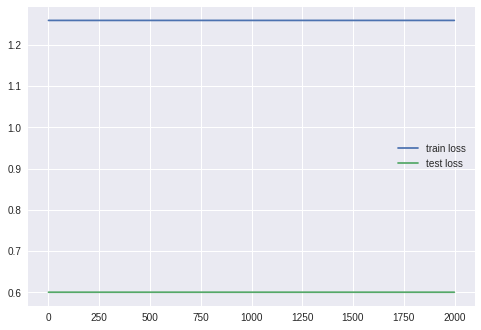

In [16]:
sess = tf.Session()
init = tf.global_variables_initializer() 
sess.run(init)
loss_vec = [] 
test_loss = []
for i in range(2000):
  sess.run(train_op, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
  
  temp_loss = sess.run(loss, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
  
  loss_vec.append(np.sqrt(temp_loss))
  
  test_temp_loss = sess.run(loss, feed_dict={x_data:x_vals_test, y_target:np.transpose([y_vals_test])}) 
  
  test_loss.append(np.sqrt(test_temp_loss))
  
  if (i+1)%100==0:
    print(i+1, temp_loss, test_temp_loss)

                                                                                   
plt.plot(loss_vec, label='train loss') 
plt.plot(test_loss, label='test loss') 
plt.legend()